In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import sys
sys.path.append('../src')
import trace
import sub_process as sp
import elev_filter

TSDC username: 'ckennedy'
TSDC password: 'Summer2018!'


In [2]:
schema_name = 'roadgrade'
tbl_name = '"tsdc_caltrans_v_points_nrel_grdsrc1_ttappend_bilinCK_7-30-18"'

# Get all veh_no and samp_no for table of interest
veh_data = sp.get_unique_veh_nums_df(schema_name, tbl_name)

In [3]:
query = '''SELECT sampno, vehno, time_rel, gpsspeed, lat, lon, grade AS usgs_grade, bilin_elev, tt_grade AS tomtom_grade, bilin_grade
FROM %s.%s
WHERE grdsrc1 = TRUE''' % (schema_name, tbl_name)

# Get the data table from postgres database
all_grades = sp.query(query)

In [4]:
# Drop duplicate table from DF
all_grades_drop = all_grades.drop_duplicates(subset=['sampno', 'time_rel', 'lat', 'lon'], keep='last', inplace=False)

# Check number of duplicate rows dropped
print("New table size", all_grades_drop.shape, "Orginal table size", all_grades.shape)

('New table size', (2357309, 10), 'Orginal table size', (11718920, 10))


In [32]:
# Append filtered bilin grade profile to table
all_grades_drop_filter = elev_filter.elev_filter(all_grades_drop)

KeyboardInterrupt: 

In [ ]:
# Scale all grade profiles to %/100

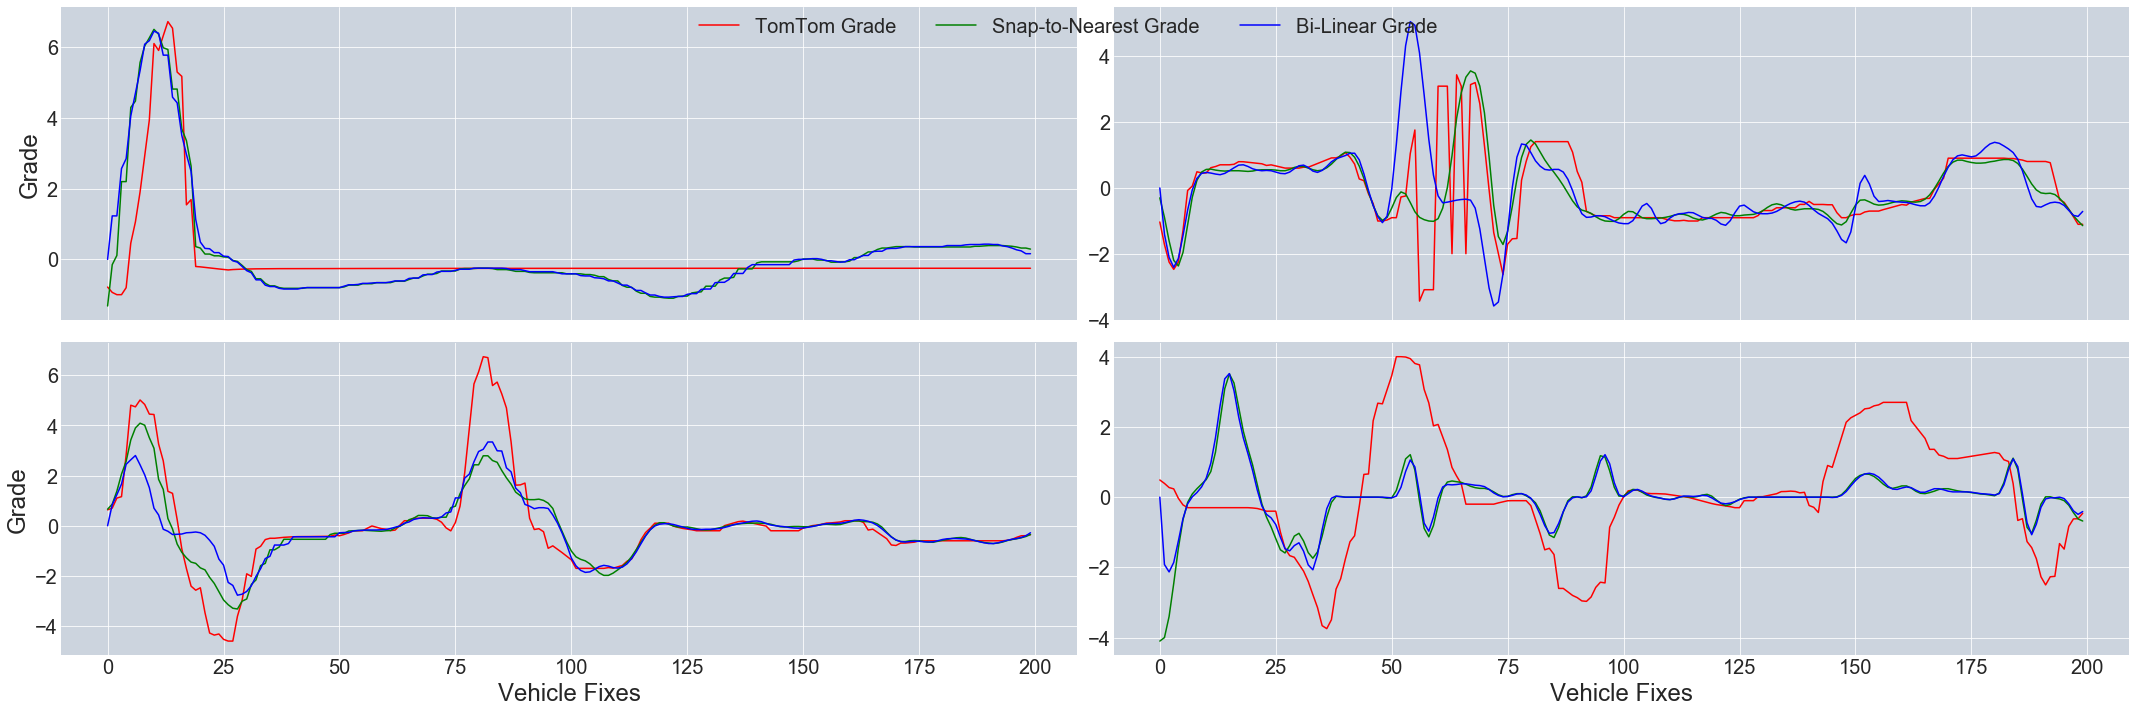

In [40]:
# Print num_plots number of tables showing 200 points from num_plots vehicles in dataset
f, axarr = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(30,10))
#f.suptitle("Comparison of Grade Profiles", fontsize=30, fontweight='bold')

num_plots = [4,5,6,3]

i, j = 0, 0

for veh in num_plots:
    samp_num = veh_data['sampno'][veh]
    veh_num = veh_data['vehno'][veh]
    grades = all_grades_drop.query('sampno == %s' % samp_num).query('vehno == %s' % veh_num)[100:300]
    
    grades = elev_filter.elev_filter(grades)

    # NOTE: change style to match other plots
    plt.style.use('seaborn-darkgrid')
    
    x = np.arange(grades.shape[0])

    #palette = plt.get_cmap('Rdbu_r')
    #fig = plt.figure(figsize=(15,8))
    #ax = fig.add_subplot(111)
    
    # Set color
    axarr[i, j].set_facecolor((0.8, 0.83, 0.87, 1.0))
    


    axarr[i, j].plot(x, grades['tomtom_grade']/10, c='r', label='TomTom Grade (Ground Truth)')
    axarr[i, j].plot(x, grades['usgs_grade']*100, c='g', label='Snap-to-Nearest Grade')
    axarr[i, j].plot(x, grades['bilin_grade_filter']*100, c='b', label='Bi-Linear Grade')
    
    axarr[i, j].tick_params(labelsize=20)
    
    axarr[0, 0].set_ylabel('Grade', labelpad=5, fontsize=24)
    axarr[1, 0].set_ylabel('Grade', labelpad=5, fontsize=24)
    axarr[1, 0].set_xlabel('Vehicle Fixes', labelpad=5, fontsize=24)
    axarr[1, 1].set_xlabel('Vehicle Fixes', labelpad=5, fontsize=24)
    
    #plt.legend(loc=2, fontsize=19)
        
    i+=1
    
    if i > 1:
        j = 1
        i = 0


#plt.legend(bbox_to_anchor=(1, 1),
       #bbox_transform=plt.gcf().transFigure)    

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
#axarr[0,0].legend(bbox_to_anchor=(0., 1., 1., 0.), loc=1,
           #ncol=3, mode="expand", borderaxespad=0., fontsize=20)

plt.figlegend(('TomTom Grade', 'Snap-to-Nearest Grade', 'Bi-Linear Grade'), loc='upper center', ncol=3, labelspacing=0., fontsize=20)

    
# Set axis labels
#ax.set_xlabel('Vehicle Fixes', labelpad=10, fontsize=24)#, fontweight='bold')
#ax.set_ylabel('Grade (%)', labelpad=7, fontsize=24)#, fontweight='bold')

# Bring subplots close to each other.
f.subplots_adjust(hspace=0.01)

plt.tight_layout()

# Set plot title
#title = "Comparison of Grade Profiles"
#plt.text(0.25, 1.0, title, transform=ax.transAxes, fontsize=30, fontweight='bold')
    
plt.savefig('../vis/grade_compare_multi.png', bbox_inches='tight')    

plt.draw()


In [ ]:
print(range(grades.shape[0])[:50])